In [2]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np

In [3]:
db = sqlalchemy.engine.url.URL(drivername='mysql',
                            host='127.0.0.1',
                            database='sherman_1',
                            query={'read_default_file': '~/.my.cnf', 'charset':'utf8'})
engine = sqlalchemy.create_engine(db)

In [4]:
df = pd.read_sql('''
    SELECT * FROM sherman_1.plugin_ios_pedometer;
''' ,engine)

In [5]:
# merge sensor info for the same participant
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')
# second device_id
l = [17,18,61,20,22,37]
l2 = set()
for index in l:
    l2.add(df_id.loc[index,'device_id2'])
# create a dict of 'device_id2':'device_id1'
my_dict = {}
for index, row in df_id.iterrows():
    if row['device_id2'] in l2:
        my_dict[row['device_id2']] = row['device_id1']
# replace
for index, row in df.iterrows():
    if row['device_id'] in my_dict:
        df.loc[index,'device_id'] = my_dict[row['device_id']]

In [ ]:
df['date'] = pd.to_datetime(df['timestamp'],unit='ms').dt.date

In [ ]:
df_less = df[['device_id','date','number_of_steps','distance','current_pace','current_cadence','floors_ascended','floors_descended']]

In [ ]:
df_output = df_less.groupby(['device_id','date']).agg(number_of_steps = ('number_of_steps', np.sum),
                                                      distance = ('distance', np.sum),
                                                      current_pace = ('current_pace', np.mean),
                                                      current_cadence = ('current_cadence', np.mean),
                                                      floors_ascended = ('floors_ascended', np.sum),
                                                      floors_descended = ('floors_descended', np.sum)
                                                     )
df_output = df_output.reset_index()
df_output

,device_id,date,current_cadence,current_pace,distance,floors_ascended,floors_descended,number_of_steps
0,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,0.0,0.0,3399.930000,7,12,5002
1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,0.0,0.0,4640.640000,8,10,7297
2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,0.0,0.0,7952.620000,13,16,11630
3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,0.0,0.0,6909.123749,9,8,10194
4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,0.0,0.0,5040.350000,12,8,7876
...,...,...,...,...,...,...,...,...
2625,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,0.0,0.0,5984.844604,2,5,9446
2626,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,0.0,0.0,22690.122584,5,4,31849
2627,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-31,0.0,0.0,1366.502480,2,5,2037
2628,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2023-01-01,0.0,0.0,0.000000,0,0,0


In [ ]:
df_output.to_csv("ios_pedometer_cleaned.csv", index = False)

# filter 1-28

In [9]:
def find_first_day(device_id, df_cleaned):
    df_target = df_cleaned[df_cleaned['device_id']==device_id]
    return min(df_target['date'])

In [10]:
def get_1_to_28(df_cleaned):
    first_day = {device_id:find_first_day(device_id, df_cleaned) 
                 for device_id in set(df_cleaned['device_id'].tolist())
                if find_first_day(device_id, df_cleaned)>=datetime.date(year=2022,month=11,day=11)}
    df_cleaned = df_cleaned[df_cleaned['device_id'].isin(first_day)]
    df_cleaned['day'] = df_cleaned.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_cleaned = df_cleaned[df_cleaned['day']<=28]
    return df_cleaned

In [11]:
df_cleaned_1_28 = get_1_to_28(df_output)
df_cleaned_1_28

/home/jch0/.conda/envs/jch0/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,device_id,date,current_cadence,current_pace,distance,floors_ascended,floors_descended,number_of_steps,day
0,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,0.0,0.0,3399.930000,7,12,5002,1
1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,0.0,0.0,4640.640000,8,10,7297,2
2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,0.0,0.0,7952.620000,13,16,11630,3
3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,0.0,0.0,6909.123749,9,8,10194,4
4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,0.0,0.0,5040.350000,12,8,7876,5
...,...,...,...,...,...,...,...,...,...
2625,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,0.0,0.0,5984.844604,2,5,9446,23
2626,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,0.0,0.0,22690.122584,5,4,31849,24
2627,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-31,0.0,0.0,1366.502480,2,5,2037,25
2628,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2023-01-01,0.0,0.0,0.000000,0,0,0,26


# lineplot

In [14]:
df_plot = copy.deepcopy(df_cleaned_1_28)
df_plot = df_plot[['number_of_steps','distance','current_pace','current_cadence','floors_ascended','floors_descended','day']]
df_plot = df_plot.groupby('day').mean()
df_plot = df_plot.reset_index()
df_plot


,day,number_of_steps,distance,current_pace,current_cadence,floors_ascended,floors_descended
0,1,2631.155844,1740.771609,0.0,0.0,1.844156,1.870130
1,2,3210.578947,2128.787037,0.0,0.0,2.855263,2.934211
2,3,3171.592105,2084.492894,0.0,0.0,2.552632,2.552632
3,4,2976.855263,1959.488374,0.0,0.0,2.592105,2.434211
4,5,3268.197368,2199.281210,0.0,0.0,2.526316,2.210526
5,6,3298.133333,2179.911890,0.0,0.0,2.560000,2.440000
6,7,2933.373333,1897.902171,0.0,0.0,2.013333,2.240000
7,8,2651.708333,1737.082966,0.0,0.0,2.958333,3.152778
8,9,2963.714286,1921.784888,0.0,0.0,2.942857,3.200000
9,10,2452.057143,1605.815088,0.0,0.0,3.200000,3.114286


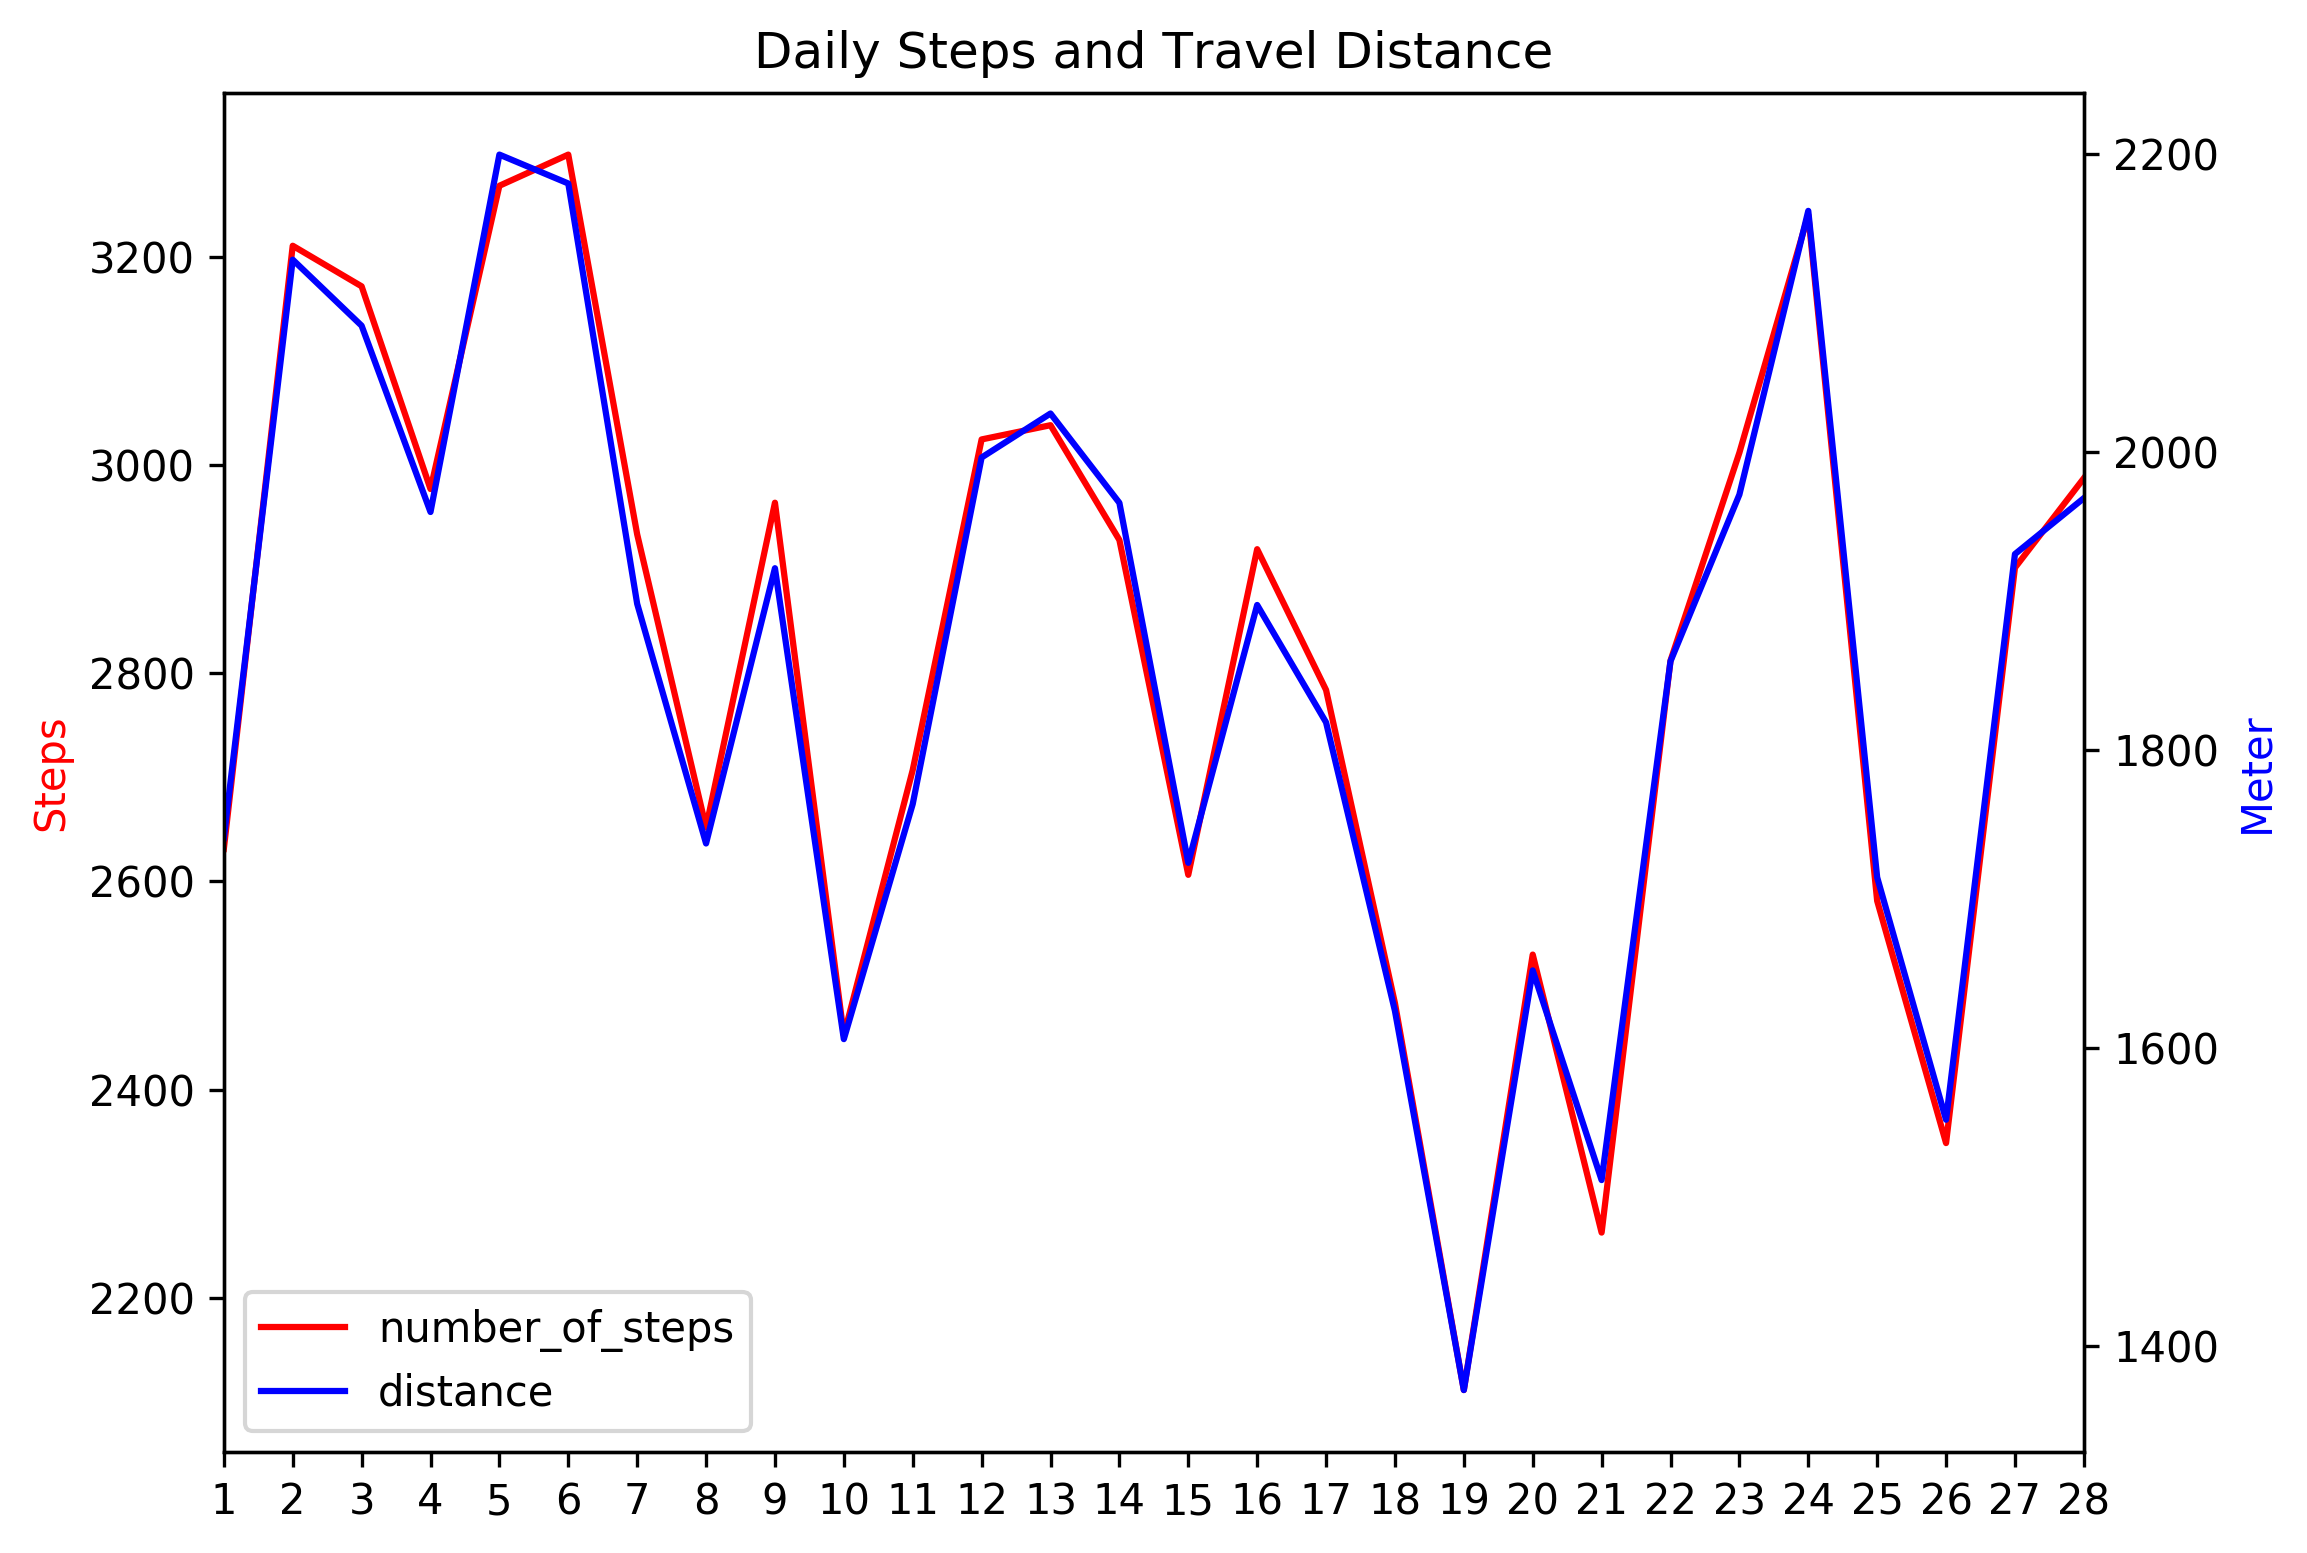

In [34]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
x = [i+1 for i in range(28)]
y1 = df_plot['number_of_steps'].tolist()
y2 = df_plot['distance'].tolist()
ln1 = ax1.plot(x,y1,label = 'number_of_steps', color = 'red')
ln2 = ax2.plot(x,y2,label = 'distance', color = 'blue')



plt.xlim(1,28)
plt.xticks([i+1 for i in range(28)],[i+1 for i in range(28)])
plt.title("Daily Steps and Travel Distance")
plt.xlabel("Days After Join")
ax1.set_ylabel('Steps', color = 'red')
ax2.set_ylabel('Meter', color = 'blue')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

# group plot

In [12]:
df_id = pd.read_csv("/data/meditation/majid/tables/id.csv")
df_id = df_id.drop_duplicates('study_id')
df_id = df_id.drop('id', axis = 1)
df_id.columns = ['device_id','Study ID']

df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv', skiprows=[1,2])[['Study ID','Group']]
df_group = df_id.merge(df_group, on = 'Study ID', how = 'left')
df_group

,device_id,Study ID,Group
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,Experimental Condition
1,f3845ba4-8702-42cf-a14f-051c46f66b61,15027959,Active Control
2,ae02314b-a607-41b9-9507-28ffa1babed7,73386307,Active Control
3,b460f89e-fd76-46ff-a960-989d74fcb66a,87785016,Active Control
4,e5048fab-dc20-4d99-8cea-220a5a2750e0,14851895,Passive Control
...,...,...,...
64,780c9b18-72d3-4714-858d-3c91b3719155,21788465,Active Control
65,a1118578-bbb4-47ef-b784-7d5bd09ad8b5,7389236,Passive Control
66,00e17b8a-4b0f-4230-bd26-3df2853e8916,69546645,Experimental Condition
67,029e57cb-fa0d-479d-abd2-9cb5745f219d,72690342,Passive Control


In [13]:
df_plot = copy.deepcopy(df_cleaned_1_28)
df_plot = df_plot.merge(df_group[['device_id','Group']], on = 'device_id', how = 'left')
df_plot = df_plot[['number_of_steps','distance','current_pace','current_cadence','floors_ascended','floors_descended','day','Group']]
df_plot = df_plot.groupby(['Group','day']).mean()
df_plot = df_plot.reset_index()
df_plot


,Group,day,number_of_steps,distance,current_pace,current_cadence,floors_ascended,floors_descended
0,Active Control,1,2720.238095,1875.659685,0.0,0.0,1.380952,1.666667
1,Active Control,2,3091.952381,2119.562978,0.0,0.0,2.380952,2.523810
2,Active Control,3,3541.714286,2336.169764,0.0,0.0,1.571429,1.761905
3,Active Control,4,3078.380952,2035.209976,0.0,0.0,1.666667,1.952381
4,Active Control,5,4218.809524,2929.109337,0.0,0.0,3.047619,2.666667
...,...,...,...,...,...,...,...,...
79,Passive Control,24,3916.111111,2551.852104,0.0,0.0,3.166667,3.444444
80,Passive Control,25,3250.333333,2116.078826,0.0,0.0,2.222222,2.833333
81,Passive Control,26,2653.500000,1736.848366,0.0,0.0,1.277778,0.944444
82,Passive Control,27,4076.944444,2707.176430,0.0,0.0,3.666667,3.444444


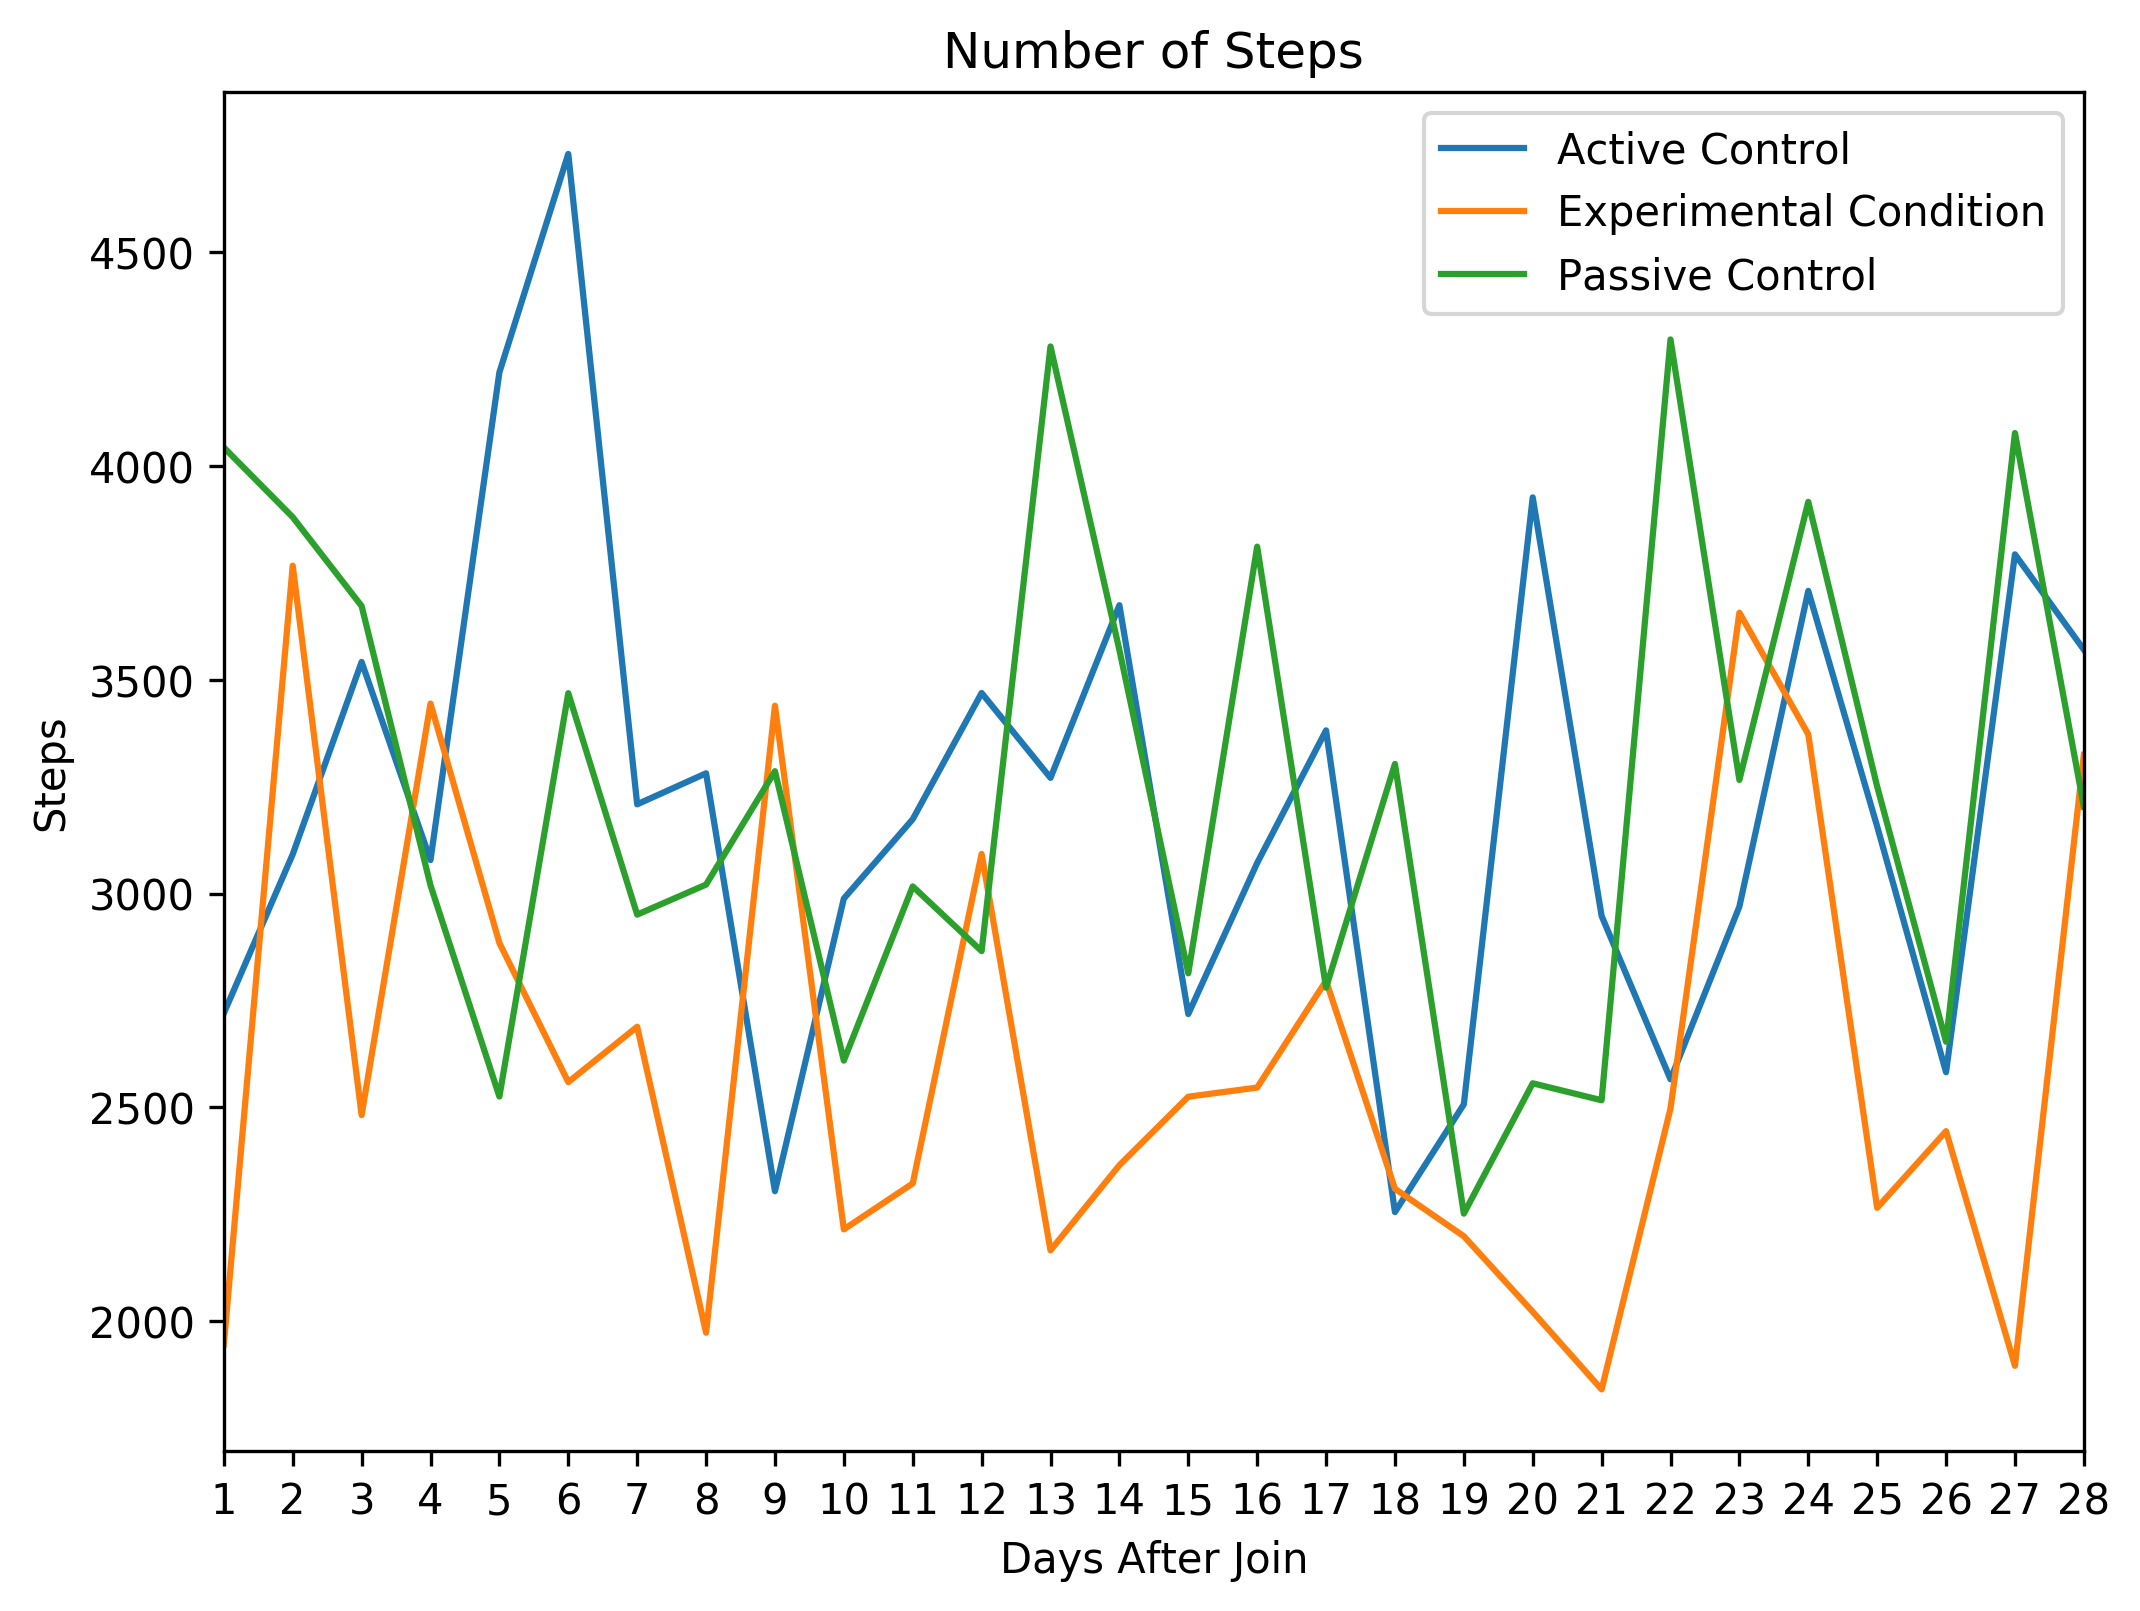

In [14]:
plt.figure(figsize=(8, 6), dpi=300)
for group in ['Active Control', 'Experimental Condition', 'Passive Control']:
    df_target = df_plot[df_plot['Group']==group]
    x = [i+1 for i in range(28)]
    y = df_target["number_of_steps"].tolist()
    plt.plot(x,y,label = group)
plt.xlim(1,28)
plt.xticks([i+1 for i in range(28)],[i+1 for i in range(28)])
plt.title("Number of Steps")
plt.xlabel("Days After Join")
plt.ylabel('Steps')
plt.legend()
plt.show()

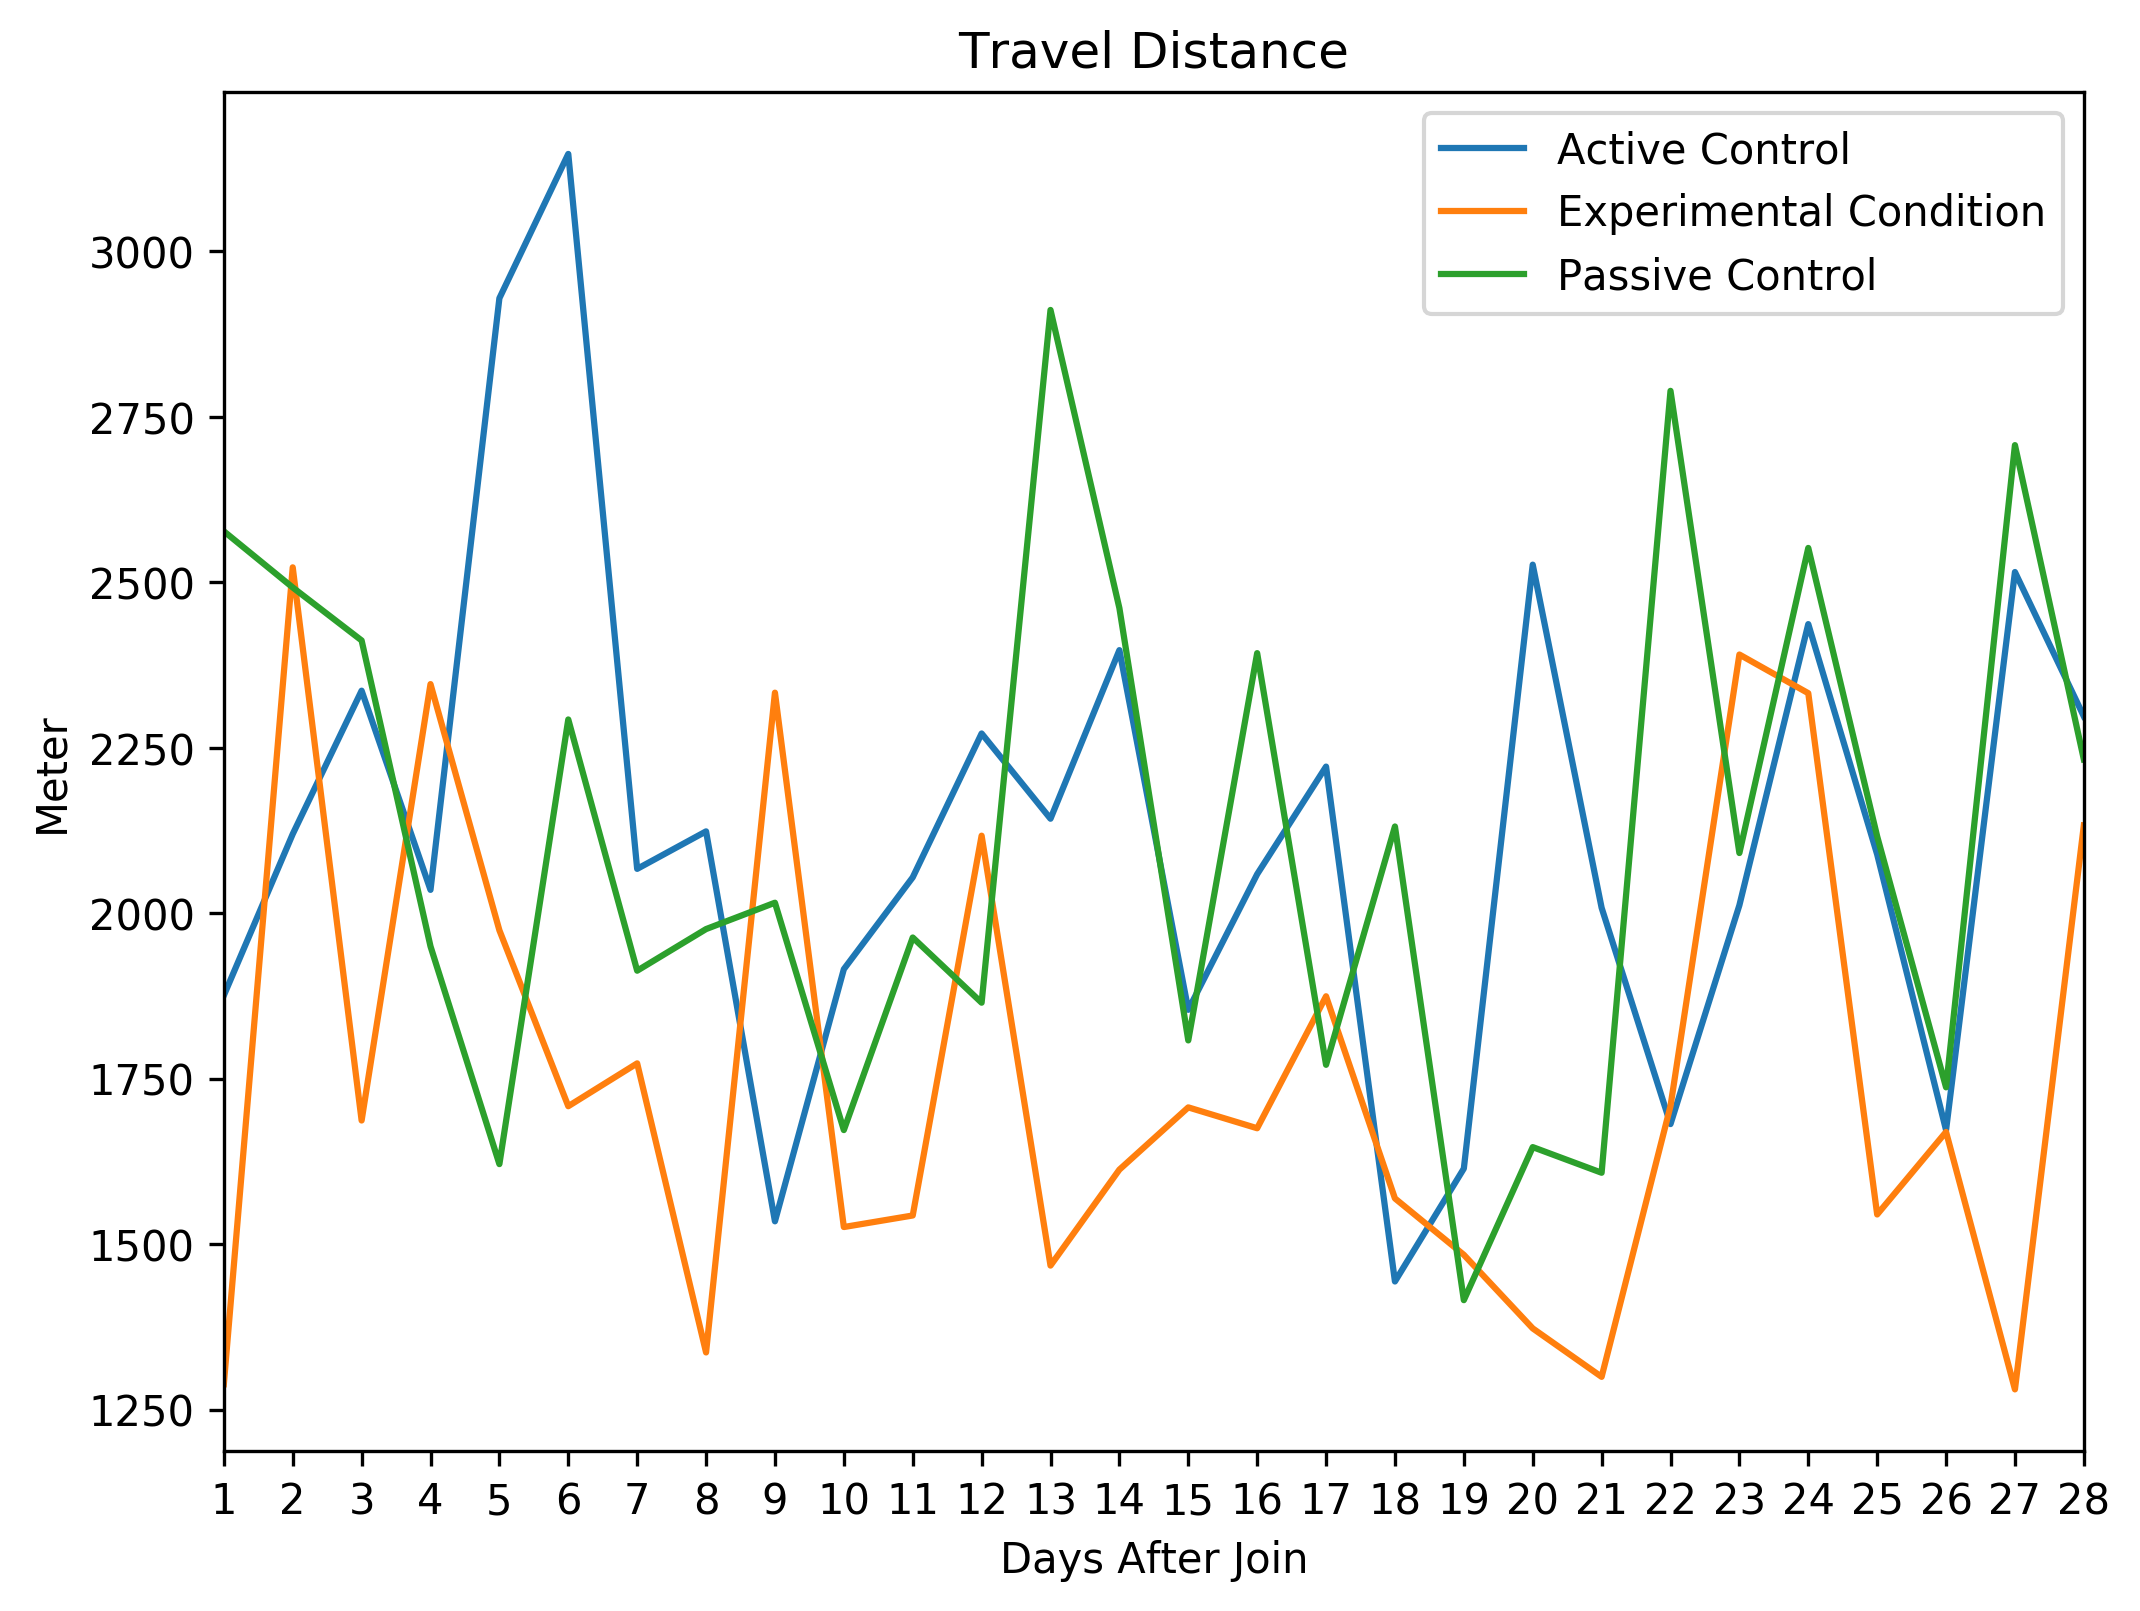

In [15]:
plt.figure(figsize=(8, 6), dpi=300)
for group in ['Active Control', 'Experimental Condition', 'Passive Control']:
    df_target = df_plot[df_plot['Group']==group]
    x = [i+1 for i in range(28)]
    y = df_target["distance"].tolist()
    plt.plot(x,y,label = group)
plt.xlim(1,28)
plt.xticks([i+1 for i in range(28)],[i+1 for i in range(28)])
plt.title("Travel Distance")
plt.xlabel("Days After Join")
plt.ylabel('Meter')
plt.legend()
plt.show()